In [16]:
import kplr
import matplotlib.pyplot as plt
import numpy as np

In [9]:
client = kplr.API()

# Search info about Kepler Objects of Interest:
koi_id = "952.01"
koi = client.koi(koi_id)
print(koi.koi_period, koi.koi_period_err1, koi.koi_period_err2)

5.90127815 7.03e-06 -7.03e-06


In [24]:
# Search information about stars:
#stars = client.stars(kic_teff="5700..5800") # Max 100 per request
star = client.star(9787239)
print("Light curves for star ", star.kic_teff)

time, flux, ferr, quality = [], [], [], []

light_curves = star.get_light_curves()
for light_curve in light_curves:
    print(light_curve.filename)
    with light_curve.open() as f:
        hdu_data = f[1].data
        time.append(hdu_data["time"])
        flux.append(hdu_data["sap_flux"])
        ferr.append(hdu_data["sap_flux_err"])
        quality.append(hdu_data["sap_quality"])
time = np.concatenate(time)
flux = np.concatenate(flux)

Light curves for star  3911
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2009166043257_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2009259160929_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2009350155506_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2010078095331_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2010174085026_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2010265121752_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2011024051157_slc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2011053090032_slc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2011073133259_llc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2011073133259_slc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/kplr009787239-2011116030358_slc.fits
/Users/miguel/.kplr/data/lightcurves/009787239/k

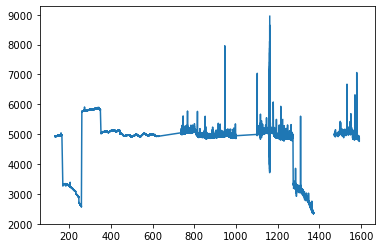

In [25]:
plt.plot(time, flux)

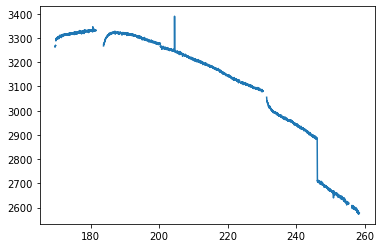

In [6]:
plt.plot(time[1], flux[1])

In [12]:
type(time)

list

In [17]:
np.array([])

array([], dtype=float64)